<a href="https://colab.research.google.com/github/FacuHerrera00/Car-Sales/blob/main/V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
%ls /content/drive/MyDrive/DataScience/Datasets/Proyecto/

 car_price_prediction.csv          V3.ipynb
 Car_sales.csv                     VentaDeAutos_+ELIA+HERRERA
 Data_Storytelling+Herrera.ipynb  'Venta de Autos+Herrera.gdoc'


In [87]:
%cd /content/drive/MyDrive/DataScience/Datasets/Proyecto/

/content/drive/MyDrive/DataScience/Datasets/Proyecto


In [88]:
df = pd.read_csv('car_price_prediction.csv')
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [89]:
mpl.style.use('bmh')
df.shape

(19237, 18)

In [90]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [91]:
##Cambiamos nombres de columnas
df.columns = ['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod_year',
       'Category', 'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color',
       'Airbags']
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod_year', 'Category',
       'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [92]:
##Reemplazamos '-' por NaN
df = df.replace('-', np.nan)
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [93]:
##Hacemos una copia por seguridad
df_1 = df.copy()

In [94]:
##Quitamos columna 'ID'
df_1.drop(columns='ID',inplace=True)
df_1.head()

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [95]:
df_1.isnull().sum(axis=0)

Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod_year              0
Category               0
Leather_interior       0
Fuel_type              0
Engine_volume          0
Mileage                0
Cylinders              0
Gear_box_type          0
Drive_wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [96]:
##Los valores nulos en Levy los podriamos transformar a 0 ya que significa que esos autos no tienen multas a pagar.
df_1['Levy'] = df_1['Levy'].replace(np.nan, 0).astype(int)
df_1.isnull().sum(axis=0)

Price               0
Levy                0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather_interior    0
Fuel_type           0
Engine_volume       0
Mileage             0
Cylinders           0
Gear_box_type       0
Drive_wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [97]:
##Vamos a reemplazar el 'km' a un valor vacio en la linea de Mileage y a tipo int64
df_1['Mileage'] = df_1['Mileage'].str.replace(r'([a-z])','').astype('int64')

In [98]:
##Ahora vamos a cambiar los valores de Doors, de '04-may' a 4-5 y '02-Mar' a 2-3.
df_1['Doors'] = df_1['Doors'].str.replace('02-Mar','2-3').replace('04-May','4-5')
df_1

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,2-3,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4-5,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,4-5,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,4-5,Left wheel,Black,4


In [99]:
df_1['Airbags'] = df_1['Airbags'].astype(object)
df_1['Cylinders'] = df_1['Cylinders'].astype(float)
df_1['Engine_volume'] = df_1['Engine_volume'].astype(str)

In [100]:
##Si la longitud de x es mayor a 3, entonces la columna Turbo tendrá un 'Yes', de lo contrario 'No'
df_1['Turbo'] = df_1['Engine_volume'].str.strip().apply(lambda x : 'Yes' if len(x) > 3 else 'No')
##Reemplazamos los valores de letras a espacios vacíos y el tipo de dato a float
df_1['Engine_volume'] = df_1['Engine_volume'].str.replace(r'([a-z,' ',A-Z])','').astype('float64')
df_1.head(10)

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12,No
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8,No
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2,No
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0,No
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4,No
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,4-5,Left wheel,White,4,No
6,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,4-5,Left wheel,White,12,No
7,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,4-5,Left wheel,Grey,12,No
8,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069,4.0,Automatic,Front,4-5,Left wheel,Black,12,No
9,26657,0,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500,6.0,Automatic,4x4,4-5,Left wheel,Silver,12,No




---

---





In [101]:
df_1['Turbo'] = df_1['Turbo'].astype(object)

In [102]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  int64  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod_year         19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather_interior  19237 non-null  object 
 7   Fuel_type         19237 non-null  object 
 8   Engine_volume     19237 non-null  float64
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  float64
 11  Gear_box_type     19237 non-null  object 
 12  Drive_wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  object

In [103]:
cat_col = list(df_1.select_dtypes('O').columns)
num_col = list(df_1.select_dtypes(np.number).columns)

In [104]:
##Mostramos las columnas que quedaron como categóricas
cat_col

['Manufacturer',
 'Model',
 'Category',
 'Leather_interior',
 'Fuel_type',
 'Gear_box_type',
 'Drive_wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags',
 'Turbo']

In [105]:
##Mostramos las columnas que quedaron como numéricas
num_col

['Price', 'Levy', 'Prod_year', 'Engine_volume', 'Mileage', 'Cylinders']

In [106]:
df_1['Cylinders'] = df_1['Cylinders'].astype(object)

In [107]:
##Mostramos los valores unicos que quedaron en las columnas cat
##for i in cat_col:
   # print(i,df[i].unique(),sep=':\n',end='\n\n')

In [108]:
##Cambiamos a números las variables [Doors, Leather_interior, Wheel, Turbo]
df_1['Doors'] = df_1['Doors'].replace({'2-3':0,'4-5':1,'>5':2}).astype(int)

###'2-3' = 0 / '4-5' = 1 / '>5' = 2

df_1['Leather_interior'] = df_1['Leather_interior'].replace({'Yes':1,'No':0}).astype(int)

###'Yes':1,'No':0

df_1['Wheel'] = df_1['Wheel'].replace({'Left wheel':1,'Right-hand drive':0}).astype(int)

###'Left wheel':1,'Right-hand drive':0

df_1['Turbo'] = df_1['Turbo'].replace({'Yes':1,'No':0}).astype(int)

###'Yes':1,'No':0

df_1['Drive_wheels'] = df_1['Drive_wheels'].replace({'4x4':0,'Front':1, 'Rear':2}).astype(int)

### '4x4':0,'Front':1, 'Rear':2

df_1['Airbags'] = df_1['Airbags'].astype(int)

In [109]:
cat_col

['Manufacturer',
 'Model',
 'Category',
 'Leather_interior',
 'Fuel_type',
 'Gear_box_type',
 'Drive_wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags',
 'Turbo']

In [110]:
num_col

['Price', 'Levy', 'Prod_year', 'Engine_volume', 'Mileage', 'Cylinders']

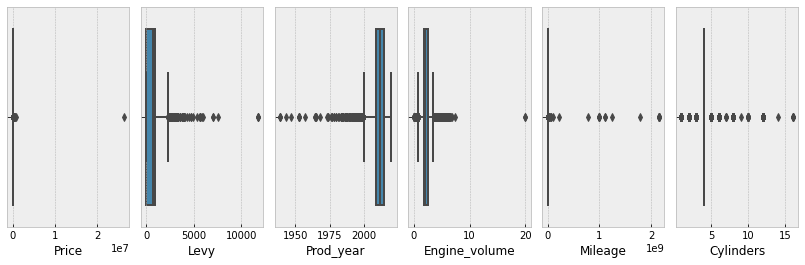

In [111]:
plt.figure(figsize=[15,7])
for i,j in enumerate(num_col):
    plt.subplot(2,8,i+1)
    sns.boxplot(df_1[j])
    plt.tight_layout()
plt.show()

Muchos outliers... 

In [112]:
df_1.loc[df_1['Model'] == 'Combo'].sort_values(by=['Price'],ascending=False).head()

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Turbo
16983,26307500,0,OPEL,Combo,1999,Goods wagon,0,Diesel,1.7,99999,4.0,Manual,1,0,1,Blue,0,0
10619,103491,0,OPEL,Combo,2008,Goods wagon,0,Diesel,1.3,230000,4.0,Manual,1,0,1,White,2,1
2884,10976,0,OPEL,Combo,2008,Sedan,0,CNG,1.6,205000,4.0,Manual,1,1,1,Silver,4,0
6024,10976,790,OPEL,Combo,2009,Goods wagon,0,CNG,1.6,152000,4.0,Manual,1,1,1,Yellow,6,0
7189,10036,790,OPEL,Combo,2009,Goods wagon,0,CNG,1.6,240000,4.0,Manual,1,1,1,White,0,0


Acá se muestra un outlier de un precio excesivo para el tipo de vehiculo que es, tambien muestra la comparación con otros valores del mismo modelo.

In [113]:
df_1.sort_values(by=['Manufacturer','Model','Price','Prod_year'],ascending=True).head()

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Turbo
13786,4861,1234,ACURA,MDX,2011,Jeep,1,Petrol,3.7,181970,6.0,Automatic,0,1,1,Brown,12,0
10146,4861,1113,ACURA,MDX,2012,Jeep,1,Petrol,3.7,147701,6.0,Automatic,0,1,1,White,12,0
3809,11760,1113,ACURA,MDX,2012,Jeep,1,Petrol,3.7,124978,6.0,Automatic,0,1,1,Black,12,0
3080,282,1273,ACURA,RDX,2015,Jeep,1,Petrol,3.5,0,6.0,Automatic,0,1,1,Blue,12,0
14717,4391,1053,ACURA,RDX,2014,Jeep,1,Petrol,3.5,0,6.0,Automatic,1,1,1,White,12,0


Hay muchos valores en 'Price' que no corresponden a un cierto modelo de auto, como se puede ver en un vehiculo ACURA RDX 2015 0km, su precio fue de USD 282 vs uno, modelo 2014 con las mismas condiciones, de USD 4391. Tendríamos que aplicar una media de valores para equiparar los precios bajos, para que el modelo pueda funcionar 

In [114]:
df_1.loc[df_1['Price'] < 2000].sort_values(by=['Manufacturer','Model'],ascending=False).head(4000)

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,Turbo
11124,470,2000,VOLVO,S70,2000,Sedan,1,Petrol,2.4,306786,5.0,Automatic,1,1,1,Silver,12,0
5394,314,779,VOLVO,S60,2013,Sedan,1,Petrol,2.5,306266,5.0,Automatic,0,1,1,White,12,0
18132,627,919,VOLKSWAGEN,Touareg,2012,Jeep,1,Diesel,3.0,158842,6.0,Automatic,0,1,1,Grey,12,0
18826,188,919,VOLKSWAGEN,Touareg,2012,Jeep,1,Diesel,3.0,242955,6.0,Automatic,0,1,1,White,12,0
5991,549,836,VOLKSWAGEN,Tiguan,2010,Jeep,1,Petrol,2.0,185496,4.0,Automatic,1,1,1,White,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14552,706,986,ACURA,TSX,2010,Sedan,1,Petrol,2.4,227576,4.0,Automatic,1,1,1,Grey,12,0
14679,69,0,ACURA,TL saber,2001,Sedan,0,Petrol,2.5,205502,6.0,Tiptronic,1,1,0,Black,4,0
336,314,1399,ACURA,TL,2010,Sedan,1,Petrol,3.5,162453,6.0,Automatic,1,1,1,Silver,12,0
4669,1176,1473,ACURA,TL,2010,Sedan,1,Petrol,3.7,280040,6.0,Automatic,0,1,1,White,12,0


Acá podemos ver otros modelos donde ocurre el mismo tipo de rareza, los cuales vamos a tener que limpiar.